<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FACEBOOK'S PROPHET

Using the prophet library for forecasting.

In [0]:
import numpy as np
import pandas as pd

from fbprophet import Prophet

## Load Data

Load the Beer, Wine and Liquor dataset. 
Prophet requires the data to be in a particular format. It only takes two columns and they must be named *ds* and *y* where *ds* is a pandas datetime object. By default, prophets expects daily date but we can work with other frequencies.

In [0]:
# Load the data, index does not need to be set and dates do not need to be parsed.
df = pd.read_csv('BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [0]:
# Rename the columns to comply with Prophet's requirements

df.columns = ['ds', 'y']

In [5]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [6]:
# Change 'ds' to a pandas datetime object

df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
ds    324 non-null datetime64[ns]
y     324 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.1 KB


### Create Prophet Model

In [9]:
# create model

m = Prophet()

# fit model on the entire dataframe

m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecast into Future

Here we can specify the frequency of the data. In this case we are working with montly data so ```freq='MS'```

In [0]:
# create placeholder dataframe for future predictions

future = m.make_future_dataframe(periods=24, freq = 'MS')  #24 months into the future

In [11]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [12]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


We can see that when we call future, it returns all the values in the original series plus the 24 new predictions.

In [0]:
# forecast

forecast = m.predict(future)

In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1149.902720,1466.410036,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1180.419186,1493.827910,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1435.131609,1742.449773,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1423.518804,1742.071067,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1644.934947,1979.787556,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516
5,1992-06-01,1780.602064,1635.298880,1963.390959,1780.602064,1780.602064,9.353397,9.353397,9.353397,9.353397,9.353397,9.353397,0.0,0.0,0.0,1789.955461
6,1992-07-01,1783.561194,1743.553772,2074.773511,1783.561194,1783.561194,126.009860,126.009860,126.009860,126.009860,126.009860,126.009860,0.0,0.0,0.0,1909.571054
7,1992-08-01,1786.618962,1660.311149,1978.721968,1786.618962,1786.618962,39.473660,39.473660,39.473660,39.473660,39.473660,39.473660,0.0,0.0,0.0,1826.092622
8,1992-09-01,1789.676731,1480.700161,1817.640762,1789.676731,1789.676731,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,-133.727623,0.0,0.0,0.0,1655.949107
9,1992-10-01,1792.635861,1577.505206,1916.742344,1792.635861,1792.635861,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,-43.568316,0.0,0.0,0.0,1749.067544


When we call ```forecast``` it returns a lot of information. However, we are mainly interested in the actual prediction ```y_hat``` as well as the upper and lower bounds/confidence intervals ```yhat_lower and yhat_upper```

In [15]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [19]:
# select variables of interest

forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4459.291007,4792.737340,4629.426372
337,2020-02-01,4511.518627,4835.497542,4680.226146
338,2020-03-01,4772.153906,5109.743878,4943.299086
339,2020-04-01,4769.322567,5101.754255,4941.866893
340,2020-05-01,5032.043549,5357.118499,5198.382732
341,2020-06-01,5014.939445,5339.767766,5178.976562
342,2020-07-01,5153.127728,5468.195021,5311.178497
343,2020-08-01,5075.152631,5402.431645,5240.705951
344,2020-09-01,4921.693533,5236.449879,5083.568322
345,2020-10-01,5023.463492,5348.619770,5189.273100


### Plot Results 

Using Prophet's built-in plotting tools.

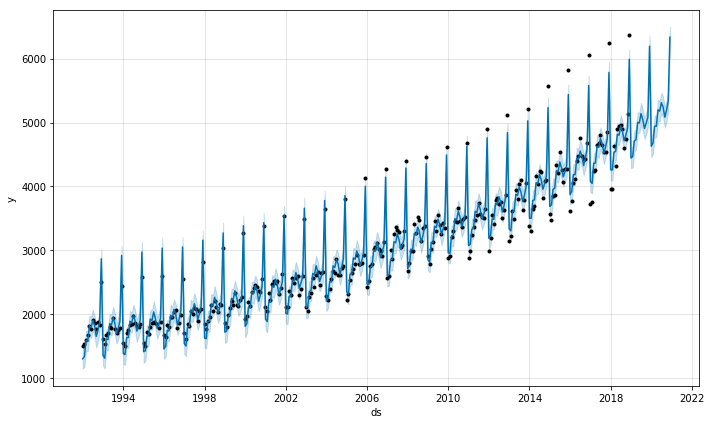

In [20]:
m.plot(forecast); 

In [32]:
# Zoom-in to 2014 onwards
'''
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
plt.xlim('2014-01-01','2021-01-01')'''

"\nimport matplotlib.pyplot as plt\n%matplotlib inline\nm.plot(forecast)\nplt.xlim('2014-01-01','2021-01-01')"

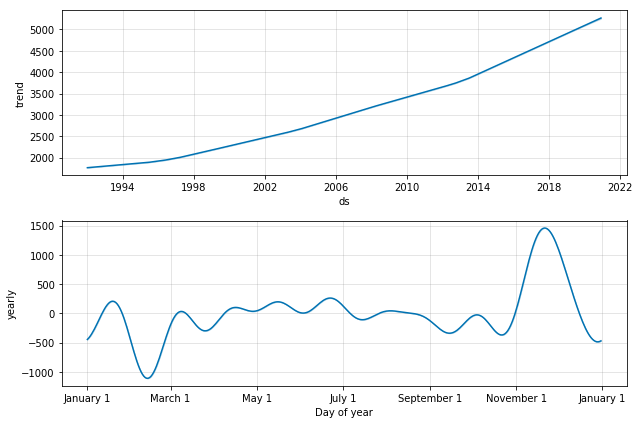

In [36]:
# Plot components

m.plot_components(forecast);